In [9]:
!pip install qiskit --quiet
!pip install qiskit-aer --quiet

In [10]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_city, plot_histogram
from qiskit_aer import AerSimulator
import numpy as np

sim = AerSimulator()

In [11]:
#Helper Function
def visualize_hadamard(init_state_vector, label):
    """
    Applies Hadamard to a single-qubit initial state and visualizes results.
    """
    qc = QuantumCircuit(1, 1)
    qc.initialize(init_state_vector, 0)
    qc.h(0)
    qc.measure(0, 0)

    # Statevector before measurement
    qc_state = QuantumCircuit(1)
    qc_state.initialize(init_state_vector, 0)
    qc_state.h(0)
    state_after = Statevector.from_instruction(qc_state)

    print(f"--- {label} ---")
    print("After Hadamard, statevector:", state_after.data)

    # Visualization
    display(plot_bloch_multivector(state_after, title=f"Bloch Sphere: H on {label}"))
    display(plot_state_city(state_after, title=f"State City: H on {label}"))

    # Simulation
    qc_t = transpile(qc, sim)
    result = sim.run(qc_t, shots=1024).result()
    counts = result.get_counts()
    display(plot_histogram(counts, title=f"Measurement Histogram: H on {label}"))
    print("\n")


--- |0> ---
After Hadamard, statevector: [0.70710678+0.j 0.70710678+0.j]


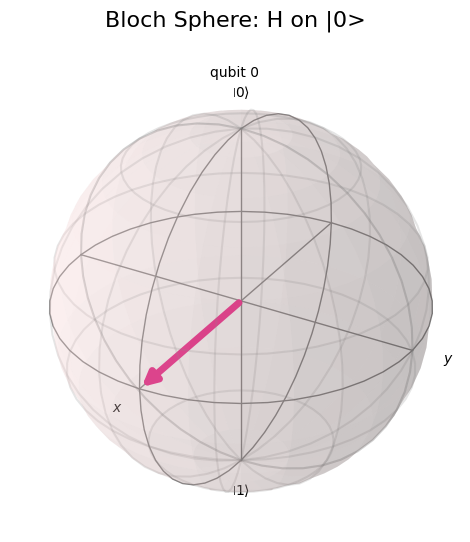

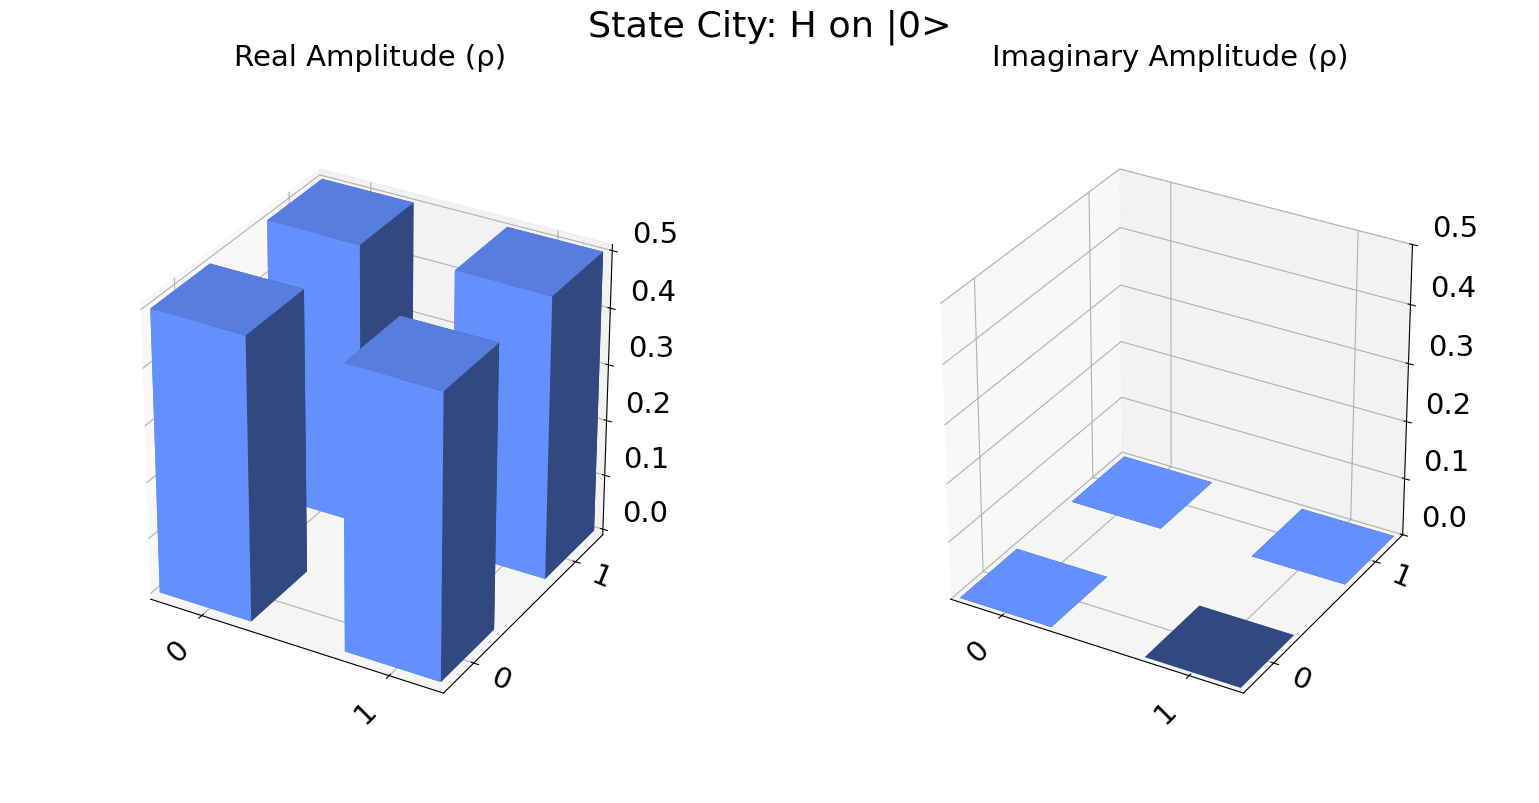

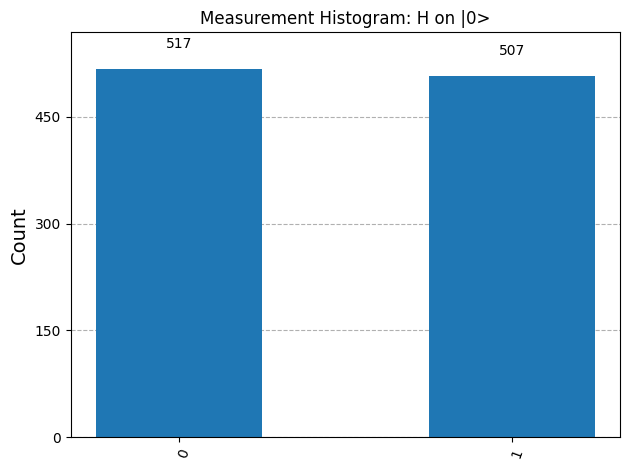



--- |1> ---
After Hadamard, statevector: [ 0.70710678+0.j -0.70710678+0.j]


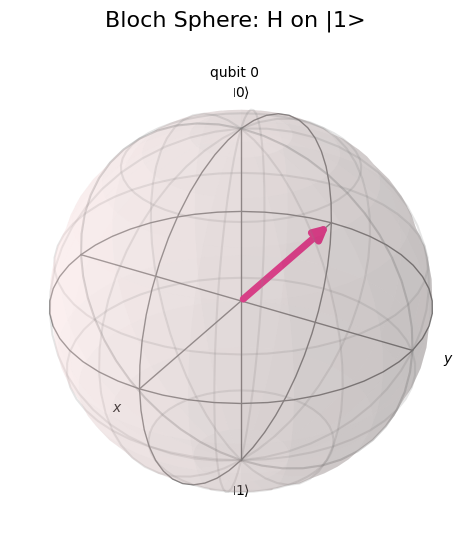

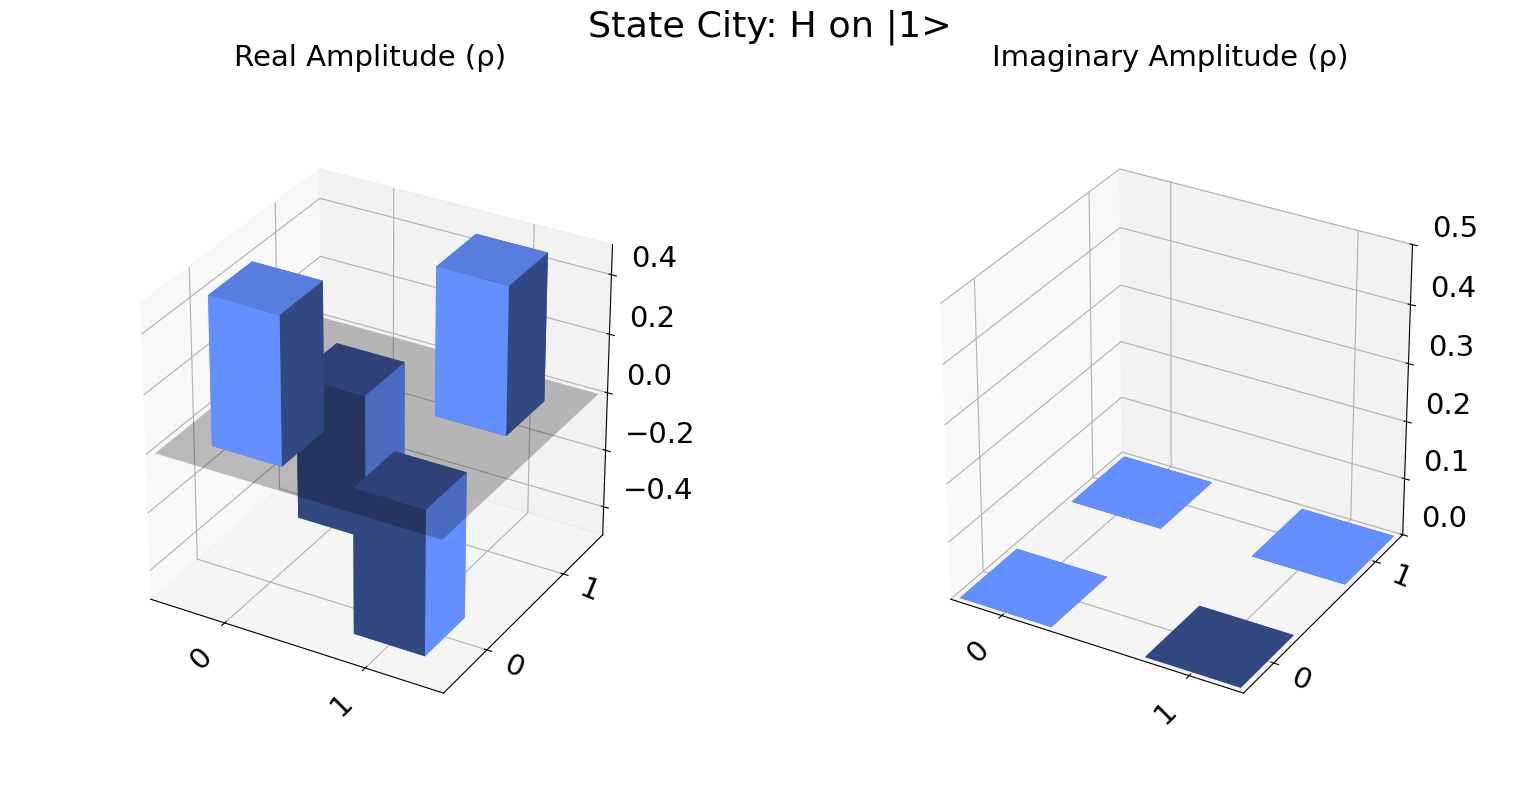

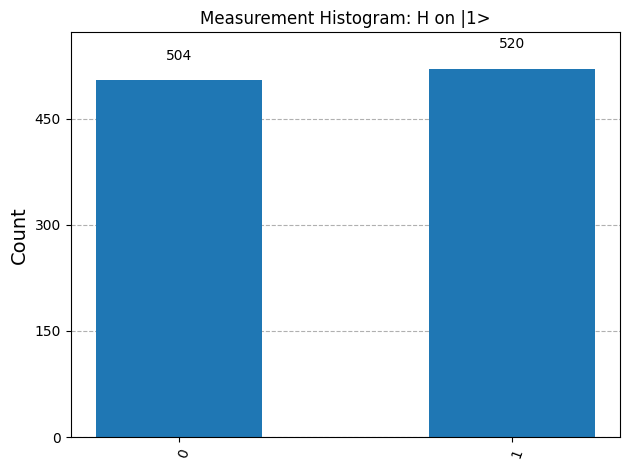



--- |+> ---
After Hadamard, statevector: [1.+0.j 0.+0.j]


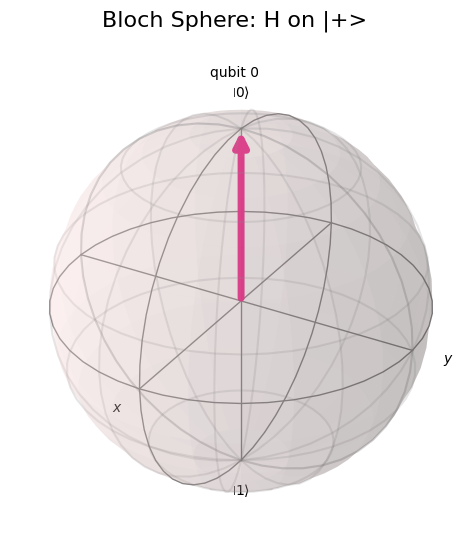

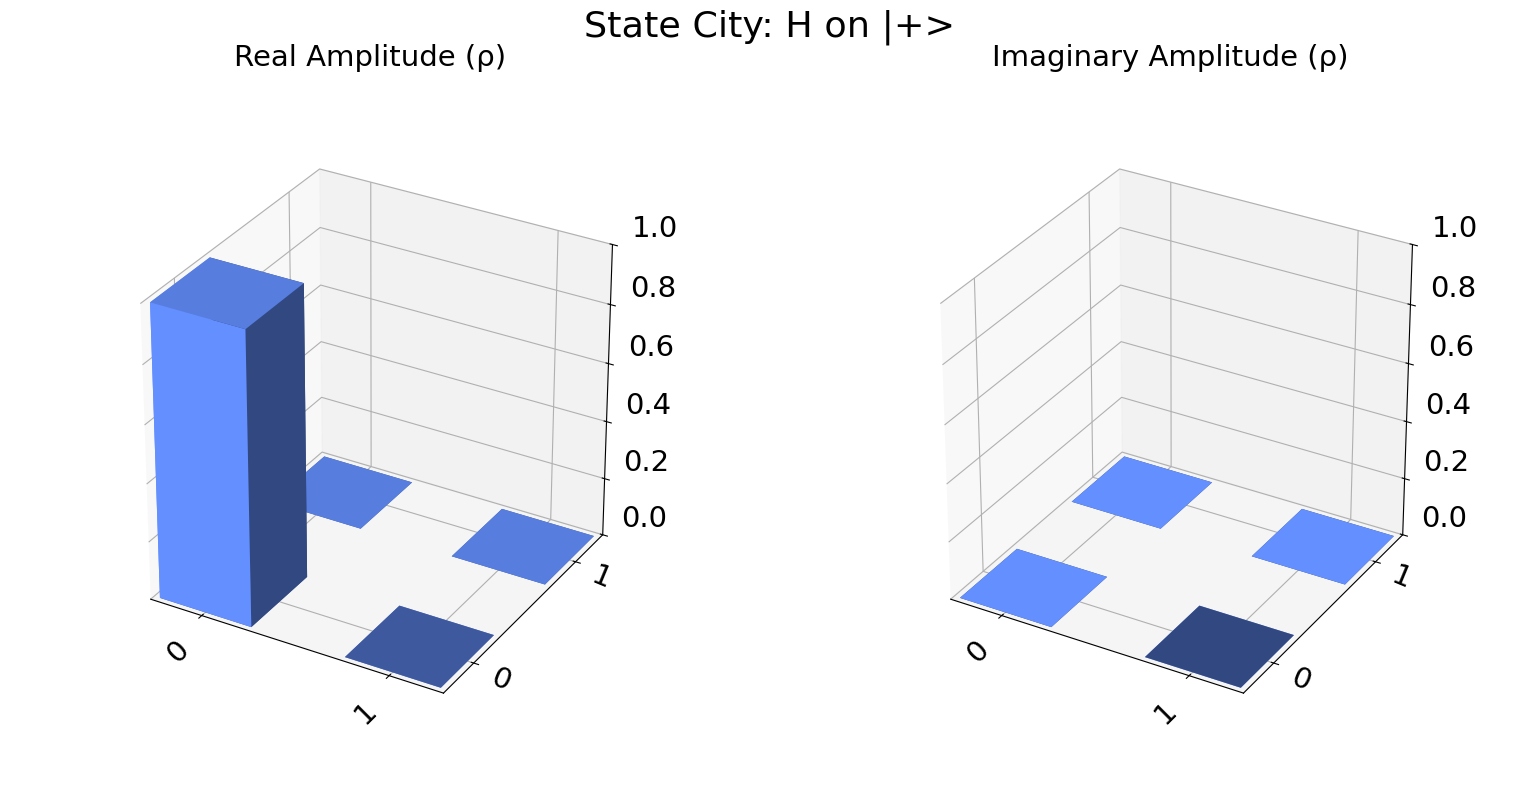

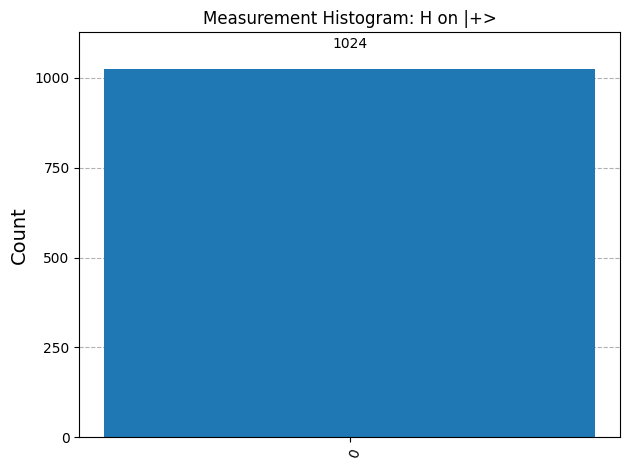



--- |-> ---
After Hadamard, statevector: [0.+0.j 1.+0.j]


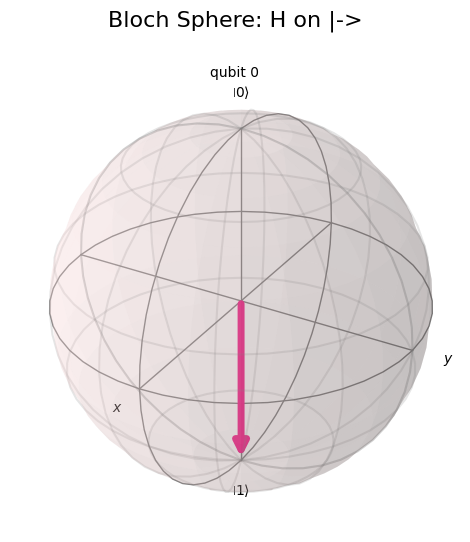

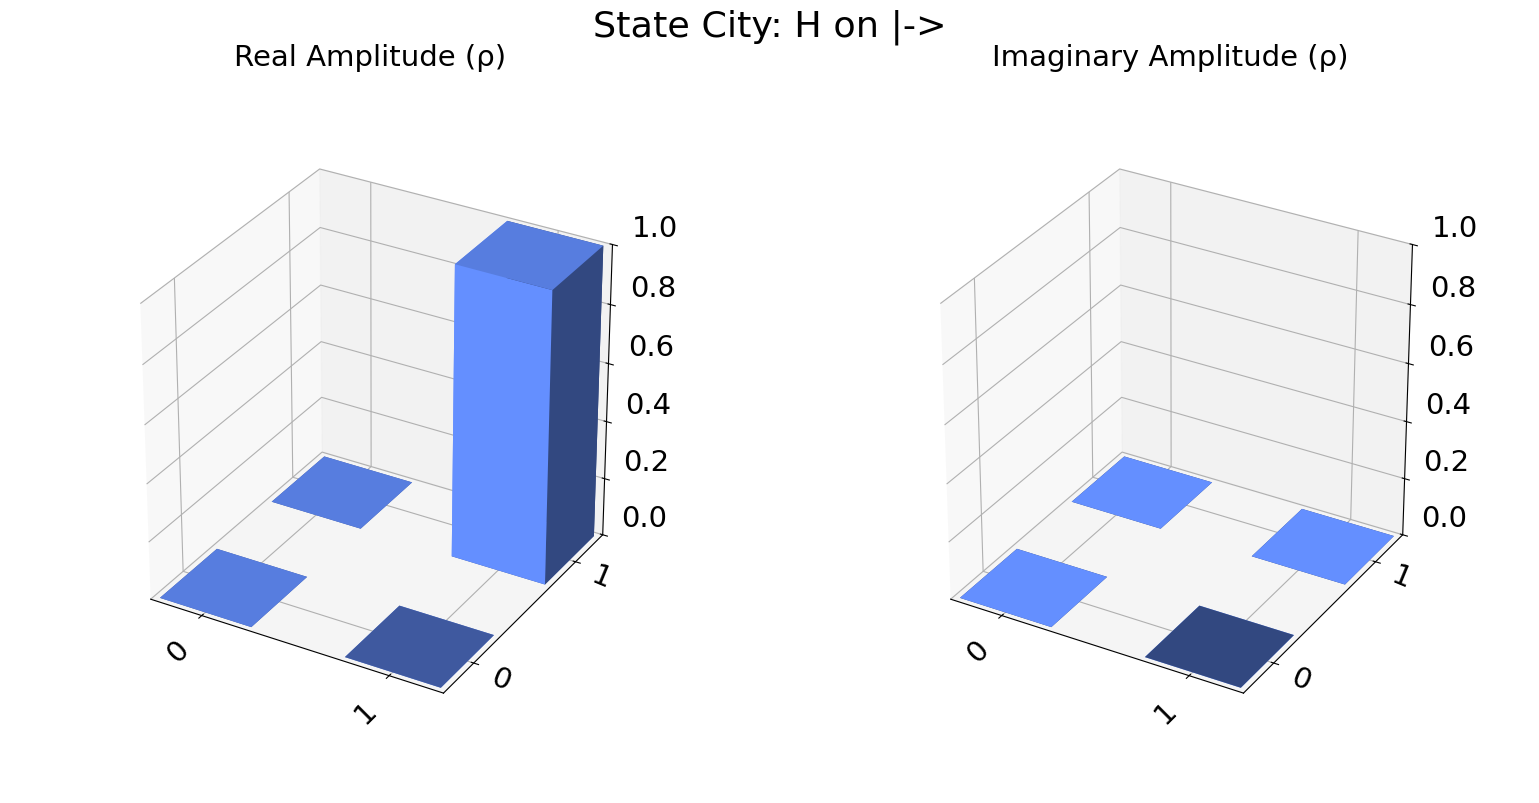

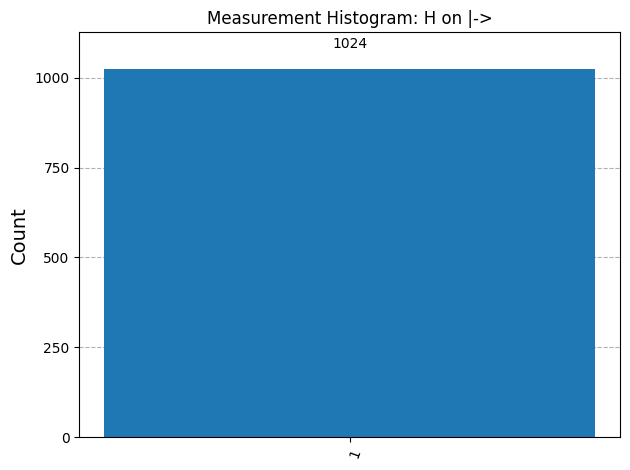

In [12]:
# Task 1: Single Qubit States

# |0>
visualize_hadamard(np.array([1, 0]), "|0>")
# |1>
visualize_hadamard(np.array([0, 1]), "|1>")
# |+> = (|0> + |1>)/√2
visualize_hadamard(np.array([1/np.sqrt(2), 1/np.sqrt(2)]), "|+>")
# |-> = (|0> - |1>)/√2
visualize_hadamard(np.array([1/np.sqrt(2), -1/np.sqrt(2)]), "|->")

--- 3-Qubit H⊗H⊗H on |000> ---
Statevector: [0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


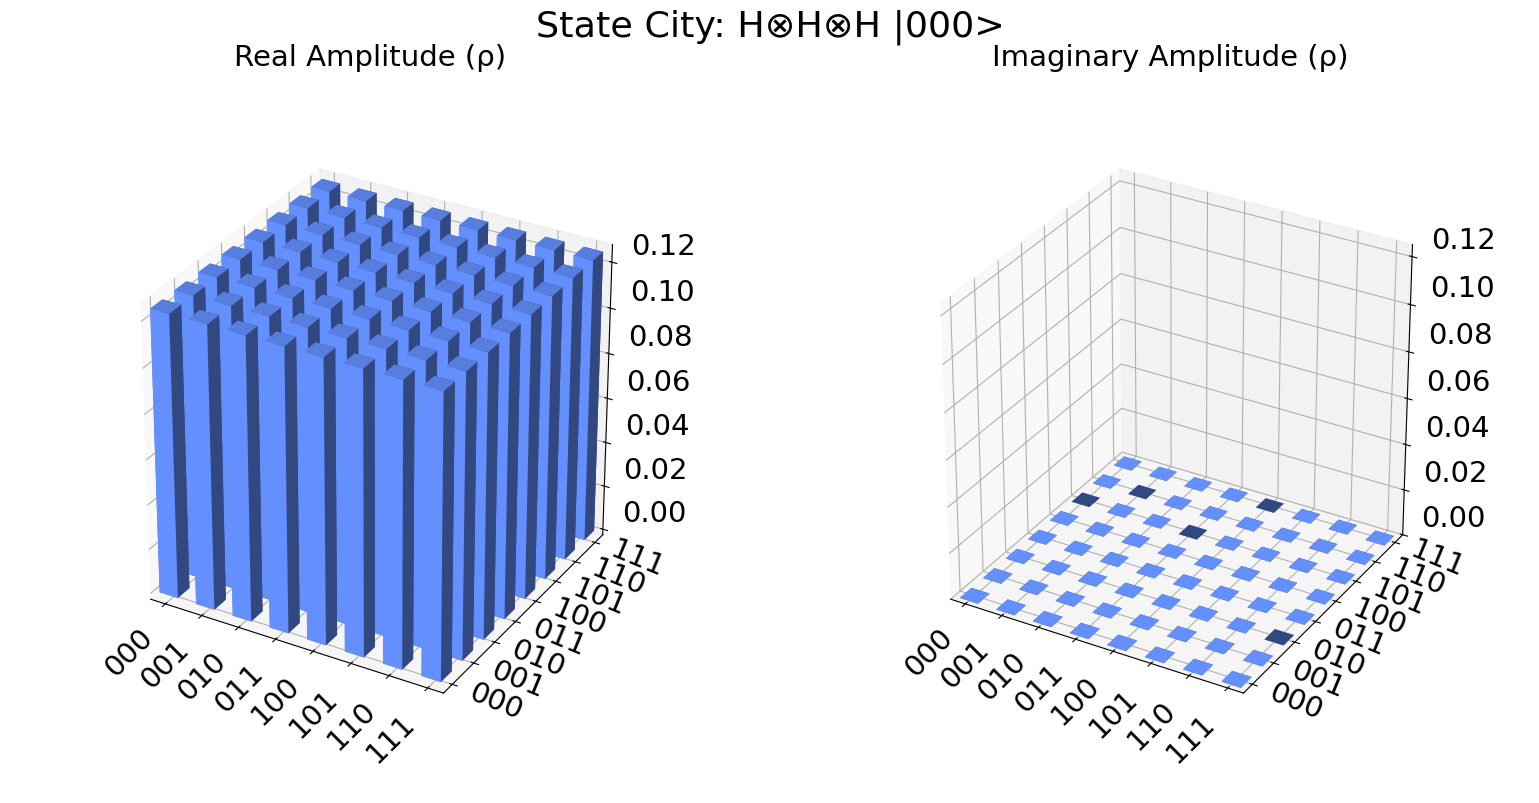

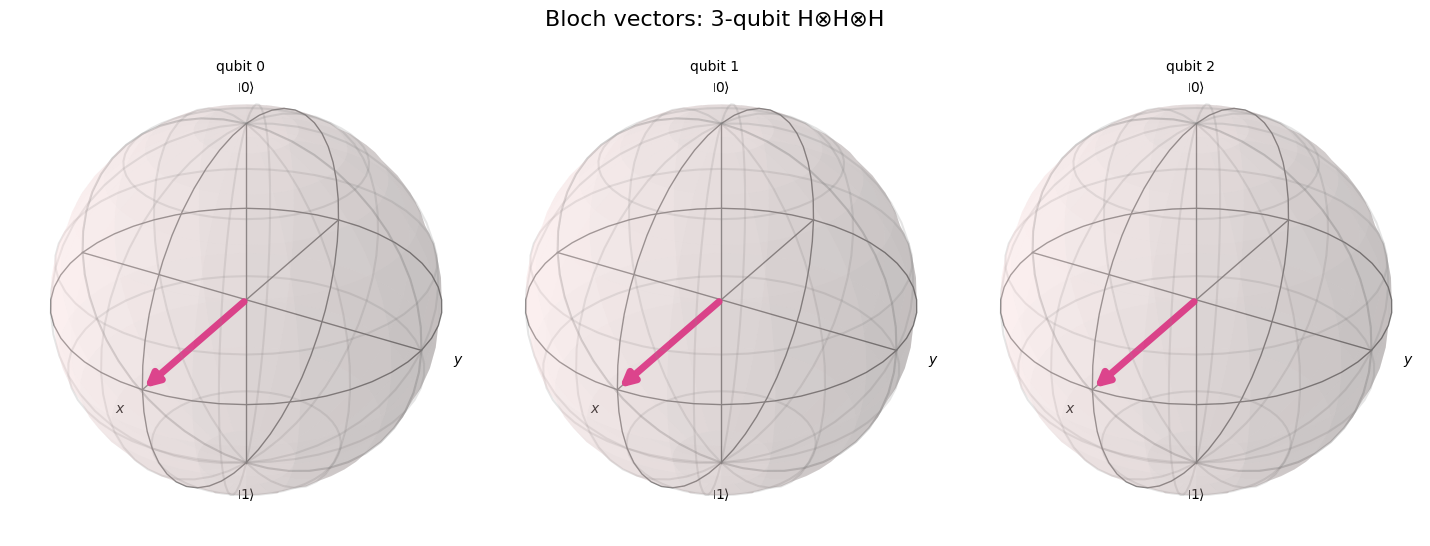

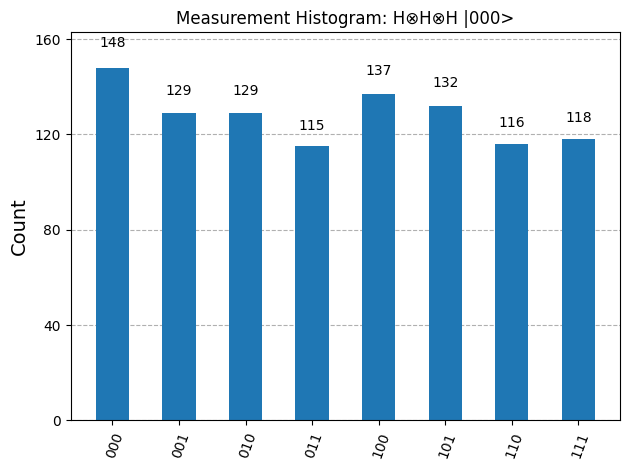


Analytical: equal probability for all 8 basis states.



In [13]:
#Task 2: 3-Qubit System (H⊗H⊗H)

qc3 = QuantumCircuit(3, 3)
qc3.h([0, 1, 2])
qc3.measure([0, 1, 2], [0, 1, 2])

qc3_state = QuantumCircuit(3)
qc3_state.h([0, 1, 2])
state3 = Statevector.from_instruction(qc3_state)

print("--- 3-Qubit H⊗H⊗H on |000> ---")
print("Statevector:", state3.data)

display(plot_state_city(state3, title="State City: H⊗H⊗H |000>"))
display(plot_bloch_multivector(state3, title="Bloch vectors: 3-qubit H⊗H⊗H"))

qc3_t = transpile(qc3, sim)
result3 = sim.run(qc3_t, shots=1024).result()
counts3 = result3.get_counts()
display(plot_histogram(counts3, title="Measurement Histogram: H⊗H⊗H |000>"))
print("\nAnalytical: equal probability for all 8 basis states.\n")


--- 3-Qubit GHZ-like State (|000> + |111>)/√2 ---
Statevector: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


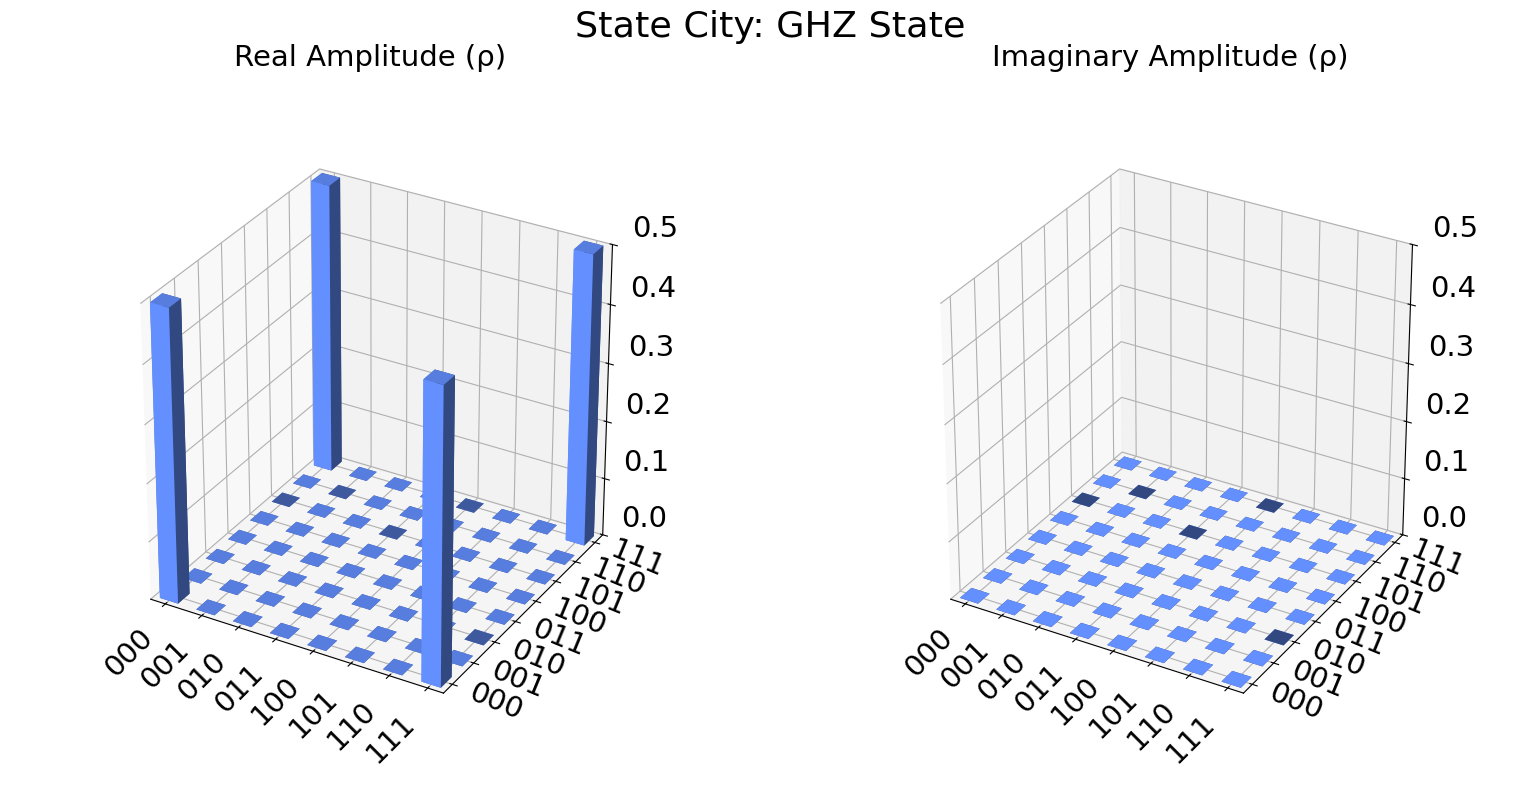

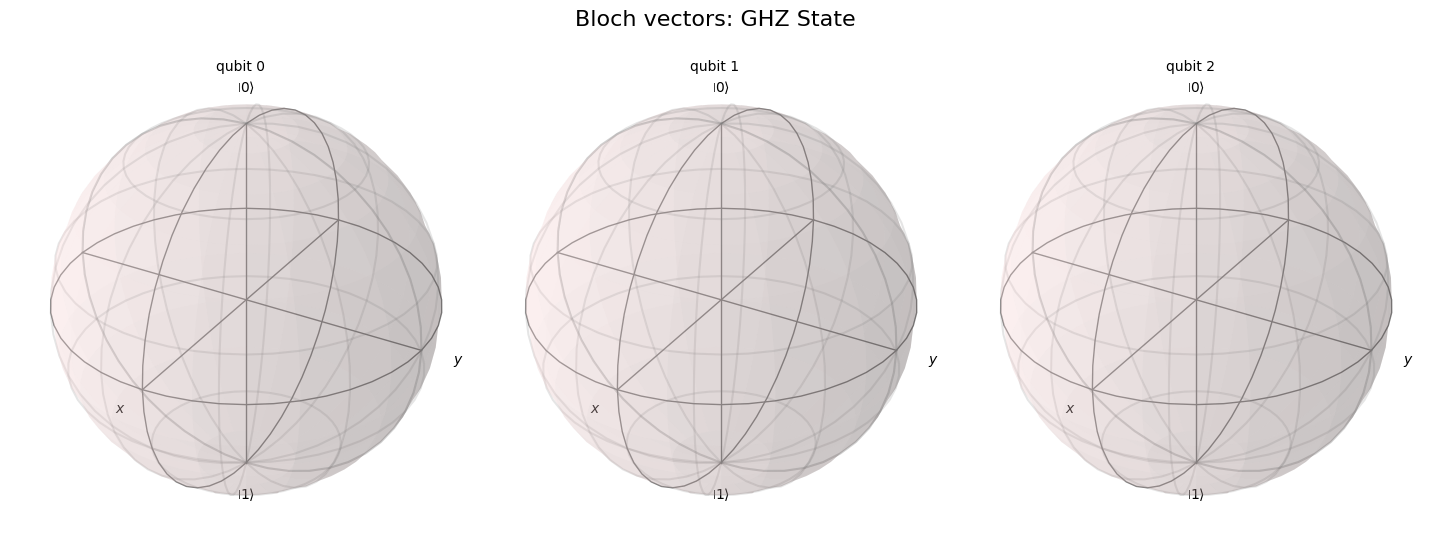

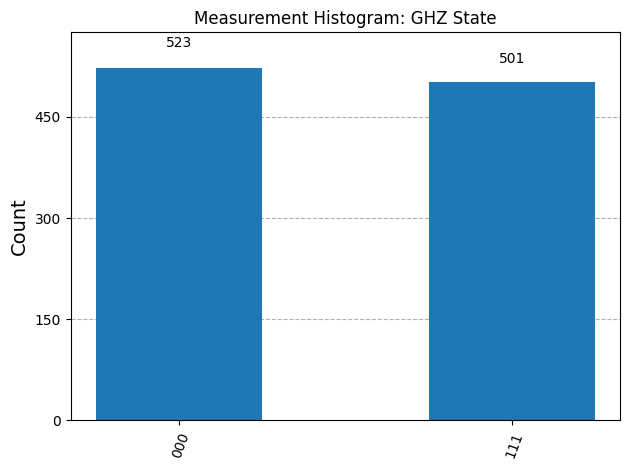


Analytical: outcomes |000> and |111>, perfect 3-qubit correlation.



In [14]:
#Task 3: Apply H + CX + CX on 3 Qubits

qc_corr = QuantumCircuit(3, 3)
qc_corr.h(0)
qc_corr.cx(0, 1)
qc_corr.cx(0, 2)
qc_corr.measure([0, 1, 2], [0, 1, 2])

qc_corr_state = QuantumCircuit(3)
qc_corr_state.h(0)
qc_corr_state.cx(0, 1)
qc_corr_state.cx(0, 2)
state_corr = Statevector.from_instruction(qc_corr_state)

print("--- 3-Qubit GHZ-like State (|000> + |111>)/√2 ---")
print("Statevector:", state_corr.data)

display(plot_state_city(state_corr, title="State City: GHZ State"))
display(plot_bloch_multivector(state_corr, title="Bloch vectors: GHZ State"))

qc_corr_t = transpile(qc_corr, sim)
result_corr = sim.run(qc_corr_t, shots=1024).result()
counts_corr = result_corr.get_counts()
display(plot_histogram(counts_corr, title="Measurement Histogram: GHZ State"))
print("\nAnalytical: outcomes |000> and |111>, perfect 3-qubit correlation.\n")


--- Verifying H² = I on |1> ---
Final statevector: [0.+0.j 1.+0.j]


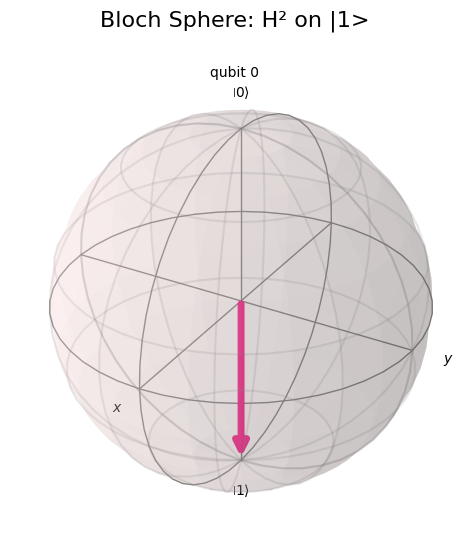

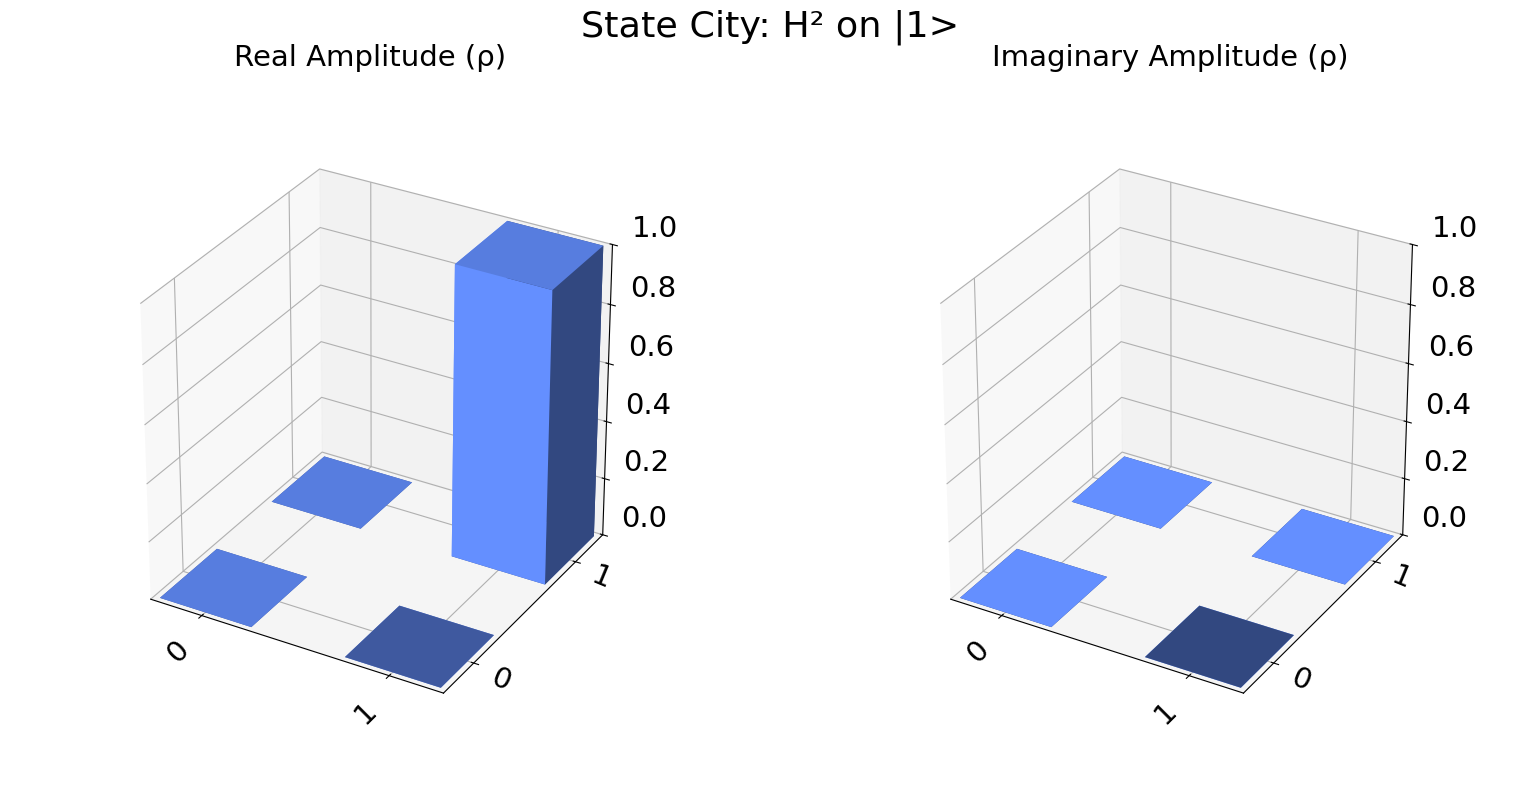

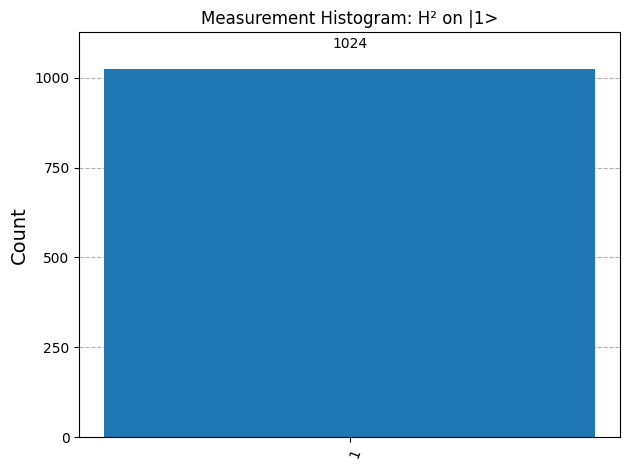


Analytical: Applying H twice returns the original |1> state.



In [15]:
#Task 4: Apply H twice on |1>

qc_h2 = QuantumCircuit(1, 1)
qc_h2.initialize([0, 1], 0)
qc_h2.h(0)
qc_h2.h(0)
qc_h2.measure(0, 0)

qc_h2_state = QuantumCircuit(1)
qc_h2_state.initialize([0, 1], 0)
qc_h2_state.h(0)
qc_h2_state.h(0)
state_h2 = Statevector.from_instruction(qc_h2_state)

print("--- Verifying H² = I on |1> ---")
print("Final statevector:", state_h2.data)

display(plot_bloch_multivector(state_h2, title="Bloch Sphere: H² on |1>"))
display(plot_state_city(state_h2, title="State City: H² on |1>"))

qc_h2_t = transpile(qc_h2, sim)
result_h2 = sim.run(qc_h2_t, shots=1024).result()
counts_h2 = result_h2.get_counts()
display(plot_histogram(counts_h2, title="Measurement Histogram: H² on |1>"))
print("\nAnalytical: Applying H twice returns the original |1> state.\n")


--- Bloch Sphere Rotation after H on |0> ---


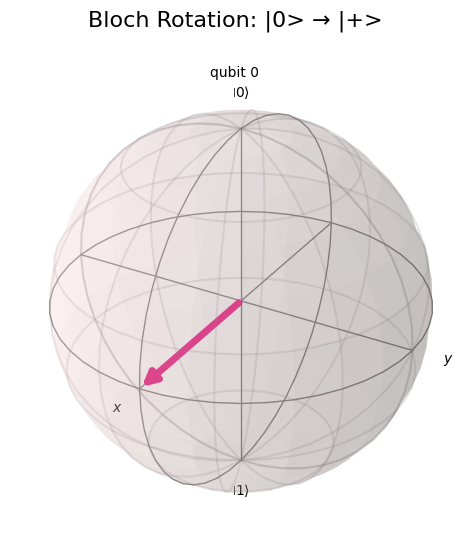

In [16]:
#Task 5: Observe Bloch Sphere Rotations

# Initial state |0>
qc_bloch = QuantumCircuit(1)
qc_bloch.h(0)
state_bloch = Statevector.from_instruction(qc_bloch)

print("--- Bloch Sphere Rotation after H on |0> ---")
display(plot_bloch_multivector(state_bloch, title="Bloch Rotation: |0> → |+>"))